acc = 0.954


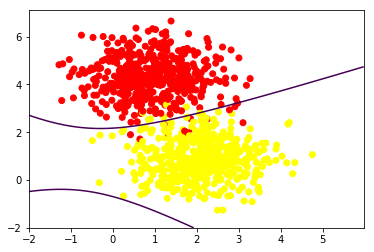

In [45]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1)
df = pd.read_csv('/Users/dashabalashova/1_1_5_ML_Bioinf/HW5/blobs2.csv')
df.columns = ['x','y','label']
df['x2'] = df['x']**2
df['y2'] = df['y']**2
df['xy'] = df['x']*df['y']
df = pd.concat([df,pd.Series([1]*df.shape[0]).rename('w0')], axis=1)

kf = StratifiedKFold(n_splits=5, shuffle=True)
kf_n = 0
predictions = []

def step(w, X, y):
    s = (1-1*(np.sign(X.dot(w))==y))
    w = w + X.T.dot(s*y)
    return w

def acc(w, X, y):
    n_row = X.shape[0]
    s = (1*(np.sign(X.dot(w))==y))
    return sum(s)[0]

res = []
for train_index, test_index in kf.split(df, df[['label']]):
    train_df = df.iloc[train_index]
    validate_df = df.iloc[test_index]
    
    w = 2*np.random.random((6,1)) - 1
    X = np.array(train_df.drop(columns=['label']))
    y = np.reshape(np.array(train_df.label)*2-1, (X.shape[0],1))
    
    X_val = np.array(validate_df.drop(columns=['label']))
    y_val = np.reshape(np.array(validate_df.label)*2-1, (X_val.shape[0],1))
    
    acc_list = []
    for n in range(0,500):
        w = step(w, X, y)
        a = acc(w, X_val, y_val)
        acc_list.append([w.flatten(), a])
    u = (list(zip(*acc_list)))
    #print(u[1], np.argmax(u[1]), u)

    res.append(u[0][np.argmax(u[1])])

#print(res)    
m = res[0]
for r in res[1:]:
    m=m+r
    
w2 = m/5

X = np.array(df.drop(columns=['label']))
y = np.reshape(np.array(df.label)*2-1, (X.shape[0],1))

v = np.array(w2).flatten()
plt.scatter(X[:,0], X[:,1], c=y.flatten(), cmap=plt.cm.autumn)
#if v[1]!=0:
#    plt.plot(X[:,0], (-v[2]-v[0]*X[:,0])/v[1])
#elif v[0]!=0:
#    plt.plot([-v[2]/v[0],-v[2]/v[0]], [min(X[:,1]),max(X[:,1])])
max(y.flatten())
#plt.show()

s = (1*(np.sign(X.dot(w))==y))    
print('acc =', sum(s)[0]/X.shape[0])

df


import matplotlib.pyplot
from numpy import arange
from numpy import meshgrid

delta = 0.025
xrange = arange(-2.0, 6.0, delta)
yrange = arange(-2.0, 6.0, delta)
x, y = meshgrid(xrange,yrange)

# F is one side of the equation, G is the other
F = x*v[0] + y*v[1]+x**2*v[2]+y**2*v[3]+x*y*v[4]+v[5]
G = 0

matplotlib.pyplot.contour(x, y, (F - G), [0])
matplotlib.pyplot.show()

acc = 0.981


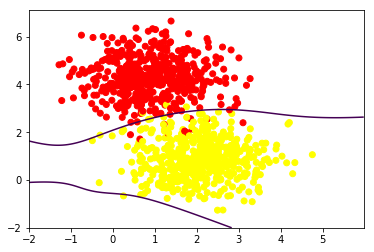

In [51]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1)
df = pd.read_csv('/Users/dashabalashova/1_1_5_ML_Bioinf/HW5/blobs2.csv')
df.columns = ['x','y','label']
df['x2'] = df['x']**2
df['y2'] = df['y']**2
df['xy'] = df['x']*df['y']

df['x3'] = df['x']**3
df['y3'] = df['y']**3
df['x2y'] = df['x']**2*df['y']
df['xy2'] = df['x']*df['y']**2

df['x4'] = df['x']**4
df['y4'] = df['y']**4
df['x2y2'] = df['x']**2*df['y']**2
df['x3y'] = df['x']**3*df['y']
df['xy3'] = df['x']*df['y']**3

df = pd.concat([df,pd.Series([1]*df.shape[0]).rename('w0')], axis=1)

kf = StratifiedKFold(n_splits=5, shuffle=True)
kf_n = 0
predictions = []

def step(w, X, y):
    s = (1-1*(np.sign(X.dot(w))==y))
    w = w + X.T.dot(s*y)
    return w

def acc(w, X, y):
    n_row = X.shape[0]
    s = (1*(np.sign(X.dot(w))==y))
    return sum(s)[0]

res = []
for train_index, test_index in kf.split(df, df[['label']]):
    train_df = df.iloc[train_index]
    validate_df = df.iloc[test_index]
    
    w = 2*np.random.random((15,1)) - 1
    X = np.array(train_df.drop(columns=['label']))
    y = np.reshape(np.array(train_df.label)*2-1, (X.shape[0],1))
    
    X_val = np.array(validate_df.drop(columns=['label']))
    y_val = np.reshape(np.array(validate_df.label)*2-1, (X_val.shape[0],1))
    
    acc_list = []
    for n in range(0,500):
        w = step(w, X, y)
        a = acc(w, X_val, y_val)
        acc_list.append([w.flatten(), a])
    u = (list(zip(*acc_list)))
    #print(u[1], np.argmax(u[1]), u)

    res.append(u[0][np.argmax(u[1])])

#print(res)    
m = res[0]
for r in res[1:]:
    m=m+r
    
w2 = m/5

X = np.array(df.drop(columns=['label']))
y = np.reshape(np.array(df.label)*2-1, (X.shape[0],1))

v = np.array(w2).flatten()
plt.scatter(X[:,0], X[:,1], c=y.flatten(), cmap=plt.cm.autumn)
#if v[1]!=0:
#    plt.plot(X[:,0], (-v[2]-v[0]*X[:,0])/v[1])
#elif v[0]!=0:
#    plt.plot([-v[2]/v[0],-v[2]/v[0]], [min(X[:,1]),max(X[:,1])])
max(y.flatten())
#plt.show()

s = (1*(np.sign(X.dot(w))==y))    
print('acc =', sum(s)[0]/X.shape[0])

df


import matplotlib.pyplot
from numpy import arange
from numpy import meshgrid

delta = 0.025
xrange = arange(-2.0, 6.0, delta)
yrange = arange(-2.0, 6.0, delta)
x, y = meshgrid(xrange,yrange)

# F is one side of the equation, G is the other
F = x*v[0] + y*v[1]+x**2*v[2]+y**2*v[3]+x*y*v[4]+x**3*v[5]+y**3*v[6]+x**2*y*v[7]+x*y**2*v[8]+x**4*v[9]+y**4*v[10]+x**2*y**2*v[11]+x**3*y*v[12]+x*y**3*v[13]+v[14]
G = 0

matplotlib.pyplot.contour(x, y, (F - G), [0])
matplotlib.pyplot.show()